In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

%matplotlib ipympl
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern"],
    "font.size": 12,
})

<h2> Fondo plasma apagado </h2>

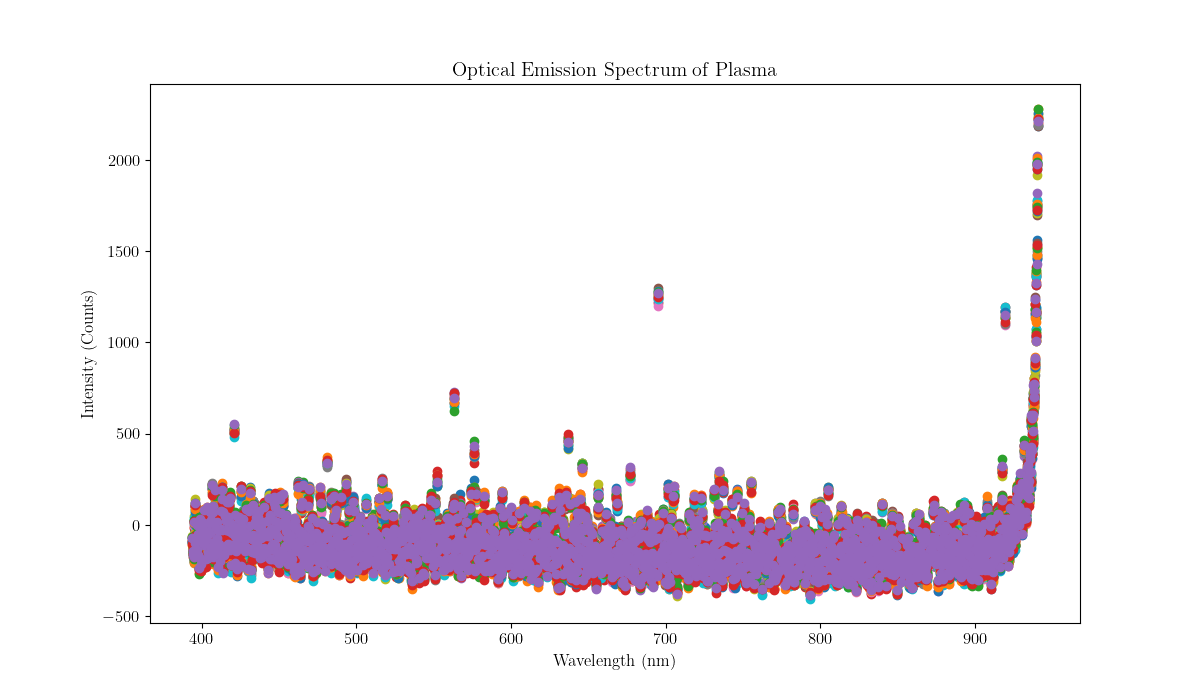

In [2]:
# src_path = "../01abr2025-wo_duplicate/UV/"
src_path = "../01abr2025-wo_duplicate/VIS/"
plt.figure(figsize=(12, 7)) # Inicializamos la figura
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity (Counts)")
plt.title("Optical Emission Spectrum of Plasma")

archivos = sorted(os.listdir(src_path))

for file in range(15):
    # Leemos el archivo
    df = pd.read_csv(os.path.join(src_path, archivos[file]), sep=";", skiprows=5).drop(index=0)
    df.columns = df.columns.str.strip()
    df = df.copy().astype(float)
    sample_counts = df['Sample']
    wavelength = df['Wave']

    plt.scatter(wavelength, sample_counts)

# plt.legend(loc="upper right" )
plt.show()

<h2> Plasma con shutter cerrado </h2>

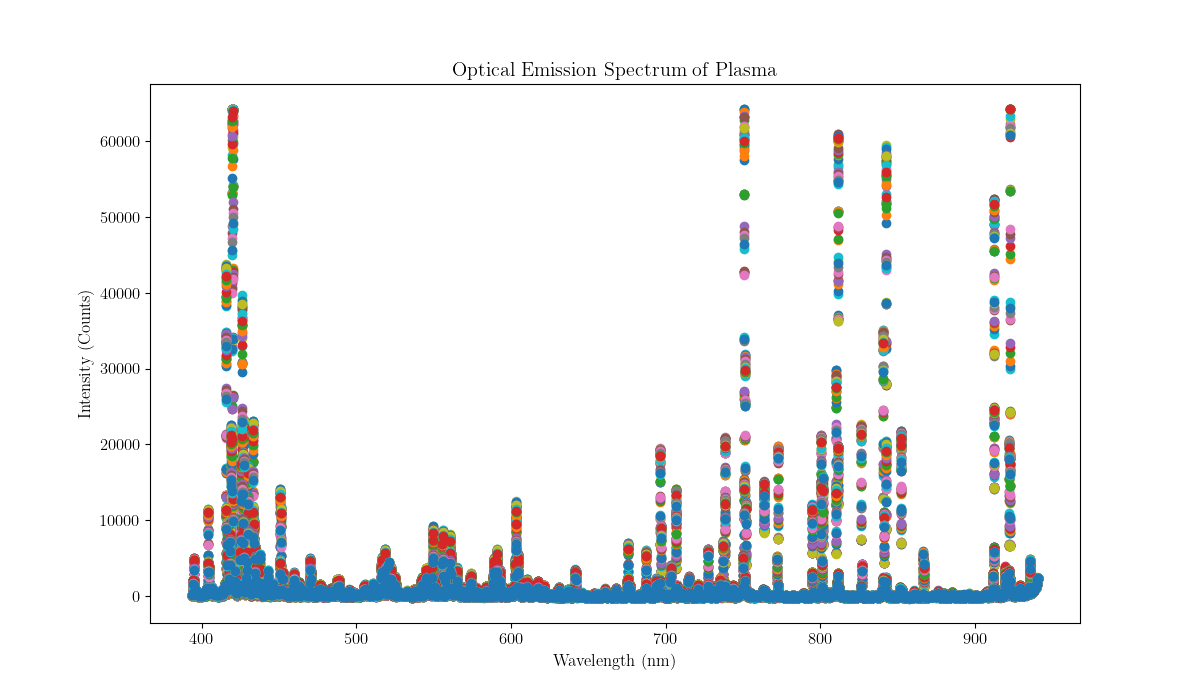

In [3]:
plt.figure(figsize=(12, 7)) # Inicializamos la figura
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity (Counts)")
plt.title("Optical Emission Spectrum of Plasma")

for file in range(16, 87):
    # Leemos el archivo
    df = pd.read_csv(os.path.join(src_path, archivos[file]), sep=";", skiprows=5).drop(index=0)
    df.columns = df.columns.str.strip()
    df = df.copy().astype(float)
    sample_counts = df['Sample']
    wavelength = df['Wave']

    plt.scatter(wavelength, sample_counts)

# plt.legend(loc="upper right" )
plt.show()

<h2> Plasma con shutter abierto </h2>

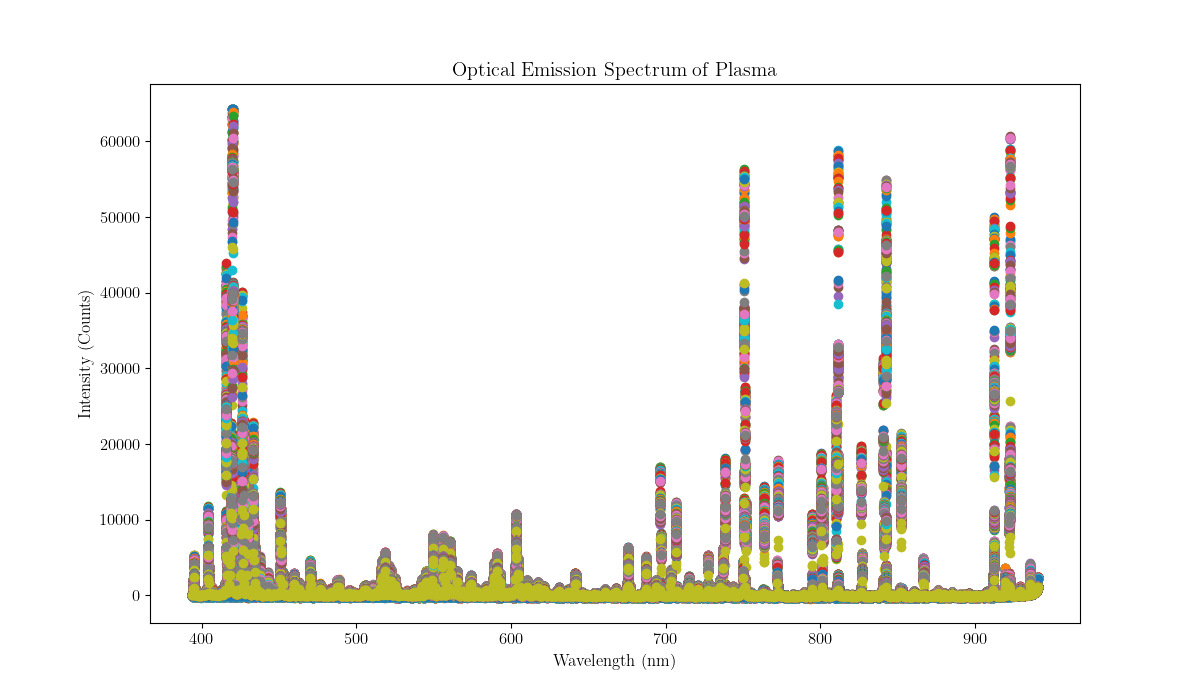

In [4]:
plt.figure(figsize=(12, 7)) # Inicializamos la figura
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity (Counts)")
plt.title("Optical Emission Spectrum of Plasma")

for file in range(87, len(archivos) - 12):
    # Leemos el archivo
    df = pd.read_csv(os.path.join(src_path, archivos[file]), sep=";", skiprows=5).drop(index=0)
    df.columns = df.columns.str.strip()
    df = df.copy().astype(float)
    sample_counts = df['Sample']
    wavelength = df['Wave']

    plt.scatter(wavelength, sample_counts)

# plt.legend(loc="upper right" )
plt.show()

<h2> Fondo final </h2>

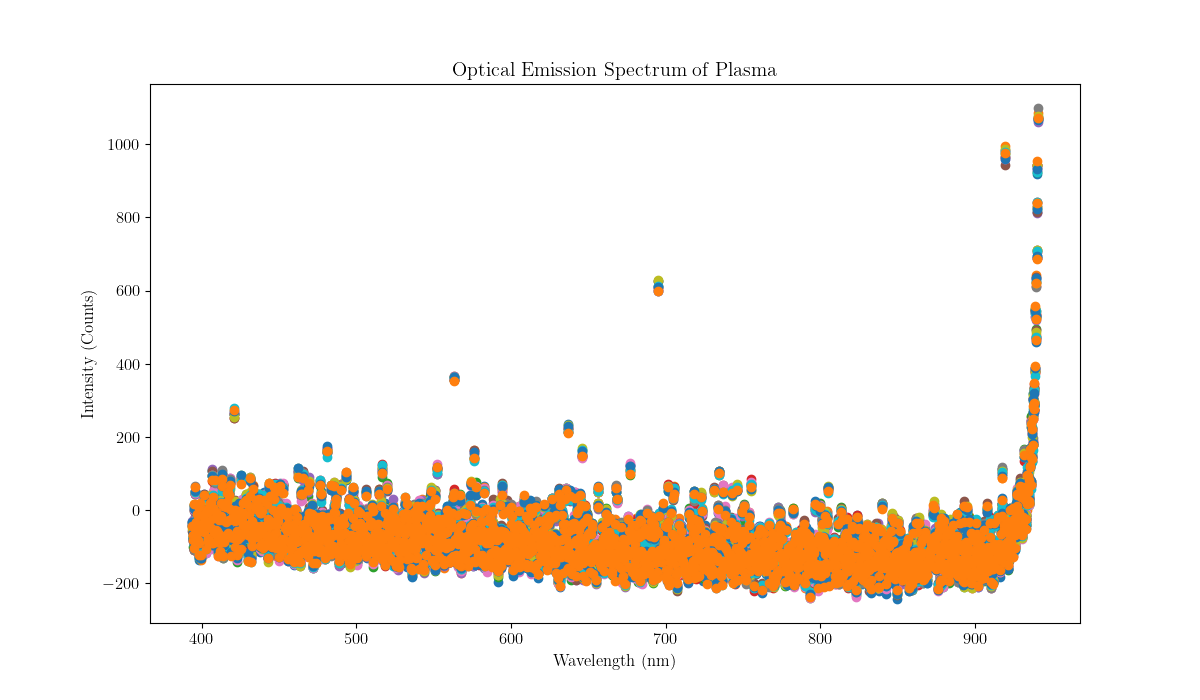

In [5]:
plt.figure(figsize=(12, 7)) # Inicializamos la figura
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity (Counts)")
plt.title("Optical Emission Spectrum of Plasma")

for file in range(len(archivos) - 1, len(archivos) - 13, -1):
    # Leemos el archivo
    df = pd.read_csv(os.path.join(src_path, archivos[file]), sep=";", skiprows=5).drop(index=0)
    df.columns = df.columns.str.strip()
    df = df.copy().astype(float)
    sample_counts = df['Sample']
    wavelength = df['Wave']

    plt.scatter(wavelength, sample_counts)

# plt.legend(loc="upper right" )
plt.show()

<h2> Promedio de ruido de fondo </h2>

In [6]:
def calcular_promedio_cuentas(directorio, file_start=0, file_end=None):
    # Número de archivos a procesar
    archivos = sorted(os.listdir(directorio))[file_start:file_end]

    # Unir el resto de los archivos
    df_cuentas = pd.concat([pd.read_csv(os.path.join(directorio, archivo), sep=";", skiprows=5, usecols=[1]).drop(index=0) for archivo in archivos], axis=1)
    
    # Convertimos los datos a numéricos
    df_cuentas = df_cuentas.apply(pd.to_numeric, errors='coerce')

    # Calculamos el promedio de las cuentas
    promedio = df_cuentas.mean(axis=1)

    # Agregamos la longitud de onda
    df = pd.concat([pd.read_csv(os.path.join(directorio, archivos[0]), sep=";", skiprows=5, usecols=[0]).drop(index=0), promedio], axis=1)
    df = df.apply(pd.to_numeric, errors='coerce')
    
    # Renombramos las columnas
    df.columns = ['Wave', 'Mean']

    return df

<h3> Promedio de ruido de fondo </h3>

<h4> UV </h4>

In [7]:
src_path_UV = "../01abr2025-wo_duplicate/UV/"
df_bg_uv = calcular_promedio_cuentas(src_path_UV, file_start=0, file_end=15)

df_bg_uv.head()

,Wave,Mean
1,197.733,110.373333
2,197.879,-174.213333
3,198.025,-111.286667
4,198.171,-153.393333
5,198.317,-69.426667


<h4> VIS </h4>

In [8]:
src_path_VIS = "../01abr2025-wo_duplicate/VIS/"
df_bg_vis = calcular_promedio_cuentas(src_path_VIS, file_start=0, file_end=15)

df_bg_vis.head()

,Wave,Mean
1,394.013,-85.077733
2,394.305,-134.004600
3,394.596,-157.229467
4,394.887,-189.881000
5,395.178,16.075933


<h3> Promedio antes de abrir el shutter </h3>
<h4> UV </h4>

In [9]:
df_bf_shutter_uv = calcular_promedio_cuentas(src_path_UV, file_start=16, file_end=87)

df_bf_shutter_uv.head()

,Wave,Mean
1,197.733,124.285915
2,197.879,-168.766197
3,198.025,-102.163380
4,198.171,-157.726761
5,198.317,-64.160563


<h4> VIS </h4>

In [10]:
df_bf_shutter_vis = calcular_promedio_cuentas(src_path_VIS, file_start=16, file_end=87)

df_bf_shutter_vis.head()

,Wave,Mean
1,394.013,71.819915
2,394.305,323.498690
3,394.596,1483.153986
4,394.887,3449.000732
5,395.178,1418.683127


<h3> Promedio después de abrir el shutter </h3>
<h4> UV </h4>

In [11]:
df_aft_shutter_uv = calcular_promedio_cuentas(src_path_UV, file_start=87, file_end=len(archivos) - 12)
df_aft_shutter_uv.head()

,Wave,Mean
1,197.733,71.269836
2,197.879,-100.175716
3,198.025,-59.149438
4,198.171,-89.673517
5,198.317,-37.773569


<h4> VIS </h4>

In [12]:
df_aft_shutter_vis = calcular_promedio_cuentas(src_path_VIS, file_start=87, file_end=len(archivos) - 12)
df_aft_shutter_vis.head()

,Wave,Mean
1,394.013,53.989896
2,394.305,223.528403
3,394.596,1221.483661
4,394.887,3013.398564
5,395.178,1161.180740


<h2> Quitando el ruido </h2>
<h3> UV </h3>

In [13]:
df_bf_shutter_uv['Counts'] = df_bf_shutter_uv['Mean'] - df_bg_uv['Mean']
df_aft_shutter_uv['Counts'] = df_aft_shutter_uv['Mean'] - df_bg_uv['Mean']

In [14]:
df_bf_shutter_uv, df_aft_shutter_uv

(         Wave         Mean      Counts
 1     197.733   124.285915   13.912582
 2     197.879  -168.766197    5.447136
 3     198.025  -102.163380    9.123286
 4     198.171  -157.726761   -4.333427
 5     198.317   -64.160563    5.266103
 ...       ...          ...         ...
 2044  470.644  1378.466197   63.126197
 2045  470.762  1742.466197   92.206197
 2046  470.881  1882.081690  138.715023
 2047  470.999  2139.943662  132.676995
 2048  471.118  2298.708451   74.101784
 
 [2048 rows x 3 columns],
          Wave         Mean      Counts
 1     197.733    71.269836  -39.103497
 2     197.879  -100.175716   74.037618
 3     198.025   -59.149438   52.137229
 4     198.171   -89.673517   63.719816
 5     198.317   -37.773569   31.653098
 ...       ...          ...         ...
 2044  470.644   799.062628 -516.277372
 2045  470.762  1003.425767 -646.834233
 2046  470.881  1104.928885 -638.437781
 2047  470.999  1270.042689 -737.223978
 2048  471.118  1353.917280 -870.689387
 
 [2048 row

<h3> VIS </h3>

In [15]:
df_bf_shutter_vis['Counts'] = df_bf_shutter_vis['Mean'] - df_bg_vis['Mean']
df_aft_shutter_vis['Counts'] = df_aft_shutter_vis['Mean'] - df_bg_vis['Mean']

In [16]:
df_bf_shutter_vis, df_aft_shutter_vis

(         Wave         Mean       Counts
 1     394.013    71.819915   156.897649
 2     394.305   323.498690   457.503290
 3     394.596  1483.153986  1640.383453
 4     394.887  3449.000732  3638.881732
 5     395.178  1418.683127  1402.607193
 ...       ...          ...          ...
 2044  939.557  1386.759155    23.712488
 2045  939.794  1545.645070    46.805070
 2046  940.031  1904.760563   158.007230
 2047  940.269  2237.864789   260.038122
 2048  940.506  2323.476056    97.342723
 
 [2048 rows x 3 columns],
          Wave         Mean       Counts
 1     394.013    53.989896   139.067629
 2     394.305   223.528403   357.533003
 3     394.596  1221.483661  1378.713127
 4     394.887  3013.398564  3203.279564
 5     395.178  1161.180740  1145.104807
 ...       ...          ...          ...
 2044  939.557   793.439673  -569.606994
 2045  939.794   889.654192  -609.185808
 2046  940.031  1108.305879  -638.447454
 2047  940.269  1338.256186  -639.570481
 2048  940.506  1371.658333  

<h2> Espectro de emisión </h2>

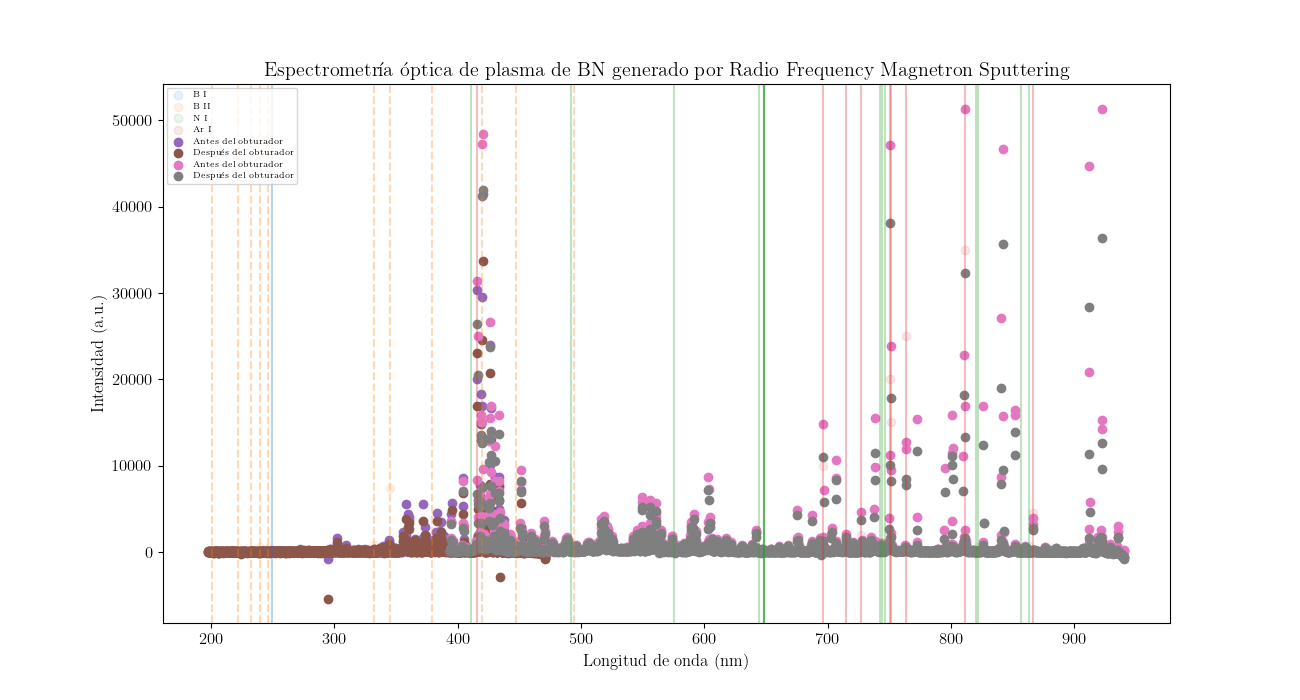

In [17]:
plt.close() # Cerrar la figura anterior

plt.figure(figsize=(13, 7))

# Cargar el archivo CSV con los datos de las líneas espectrales
df_lines = pd.read_csv("../lineas_new.csv")

wavelength = df_lines['ritz_wl_air(nm)']
intensidad = df_lines['intens']

# Crear una columna para el elemento y el número
df_lines['element_sp'] = df_lines['element'] + ' ' + np.where(df_lines['sp_num'] == 1, 'I', 'II')


conditions = [
    df_lines['element_sp'] == 'B I',
    df_lines['element_sp'] == 'B II',
    df_lines['element_sp'] == 'N I',
    df_lines['element_sp'] == 'Ar I',
]

for condition in conditions:
    scatter = plt.scatter(df_lines[condition]['ritz_wl_air(nm)'], df_lines[condition]['intens'], label=df_lines[condition]['element_sp'].iloc[0], alpha=0.1) 

    color = scatter.get_facecolors()[0]
    sp_num = df_lines[condition]['sp_num'].iloc[0]
    linestyle = '--' if sp_num == 2 else '-'

    # Líneas verticales
    for wl, intens in zip(df_lines[condition]['ritz_wl_air(nm)'], df_lines[condition]['intens']):
        if sp_num == 2: # Ionizado
            plt.axvline(wl, 0, intens, alpha=0.3, color=color, linestyle=linestyle)
        else: # Excitado
            plt.axvline(wl, 0, intens, alpha=0.3, color=color, linestyle=linestyle)


plt.scatter(df_bf_shutter_uv['Wave'], df_bf_shutter_uv['Counts'], label='Antes del obturador')
plt.scatter(df_aft_shutter_uv['Wave'], df_aft_shutter_uv['Counts'], label='Después del obturador')
plt.scatter(df_bf_shutter_vis['Wave'], df_bf_shutter_vis['Counts'], label='Antes del obturador')
plt.scatter(df_aft_shutter_vis['Wave'], df_aft_shutter_vis['Counts'], label='Después del obturador')

plt.xlabel("Longitud de onda (nm)")
plt.ylabel("Intensidad (a.u.)")
plt.title("Espectrometría óptica de plasma de BN generado por Radio Frequency Magnetron Sputtering")

plt.legend(loc="upper left", fontsize=6)
plt.show()